# Garment Case Study

The following are the columns in the data


**date**			:	Date in MM-DD-YYYY

**day**			:	Day of the Week

**quarter**			:	A portion of the month. A month was divided into four quarters

**department**		:	Associated department with the instance

**team_no**			:	Associated team number with the instance

**no_of_workers**		:	Number of workers in each team

**no_of_style_change**	:	Number of changes in the style of a particular product

**targeted_productivity**	:	Targeted productivity set by the Authority for each team for each day.

**smv**			:	Standard Minute Value, it is the allocated time for a task

**wip**			:	Work in progress. Includes the number of unfinished items for products

**over_time**		:	Represents the amount of overtime by each team in minutes

**incentive**		:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

**idle_time**		:	The amount of time when the production was interrupted due to several reasons

**idle_men**		:	The number of workers who were idle due to production interruption

**actual_productivity**	:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
#Import the dataset

df = pd.read_csv('garment.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Data Health Checks

 1. Info and describe
 2. Missing values checks
 3. Data types checks
 3. duplicates checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
df.describe(include = 'all')

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197,1197,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,59,5,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3/11/2015,Quarter1,sweing,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,360,691,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,NaN,NaN,NaN,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,NaN,NaN,NaN,NaN,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,NaN,NaN,NaN,NaN,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,NaN,NaN,NaN,NaN,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,NaN,NaN,NaN,NaN,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253


## Observations:

In [ ]:
df.isnull().sum()/df.shape[1]

date                      0.000000
quarter                   0.000000
department                0.000000
day                       0.000000
team                      0.000000
targeted_productivity     0.000000
smv                       0.000000
wip                      33.733333
over_time                 0.000000
incentive                 0.000000
idle_time                 0.000000
idle_men                  0.000000
no_of_style_change        0.000000
no_of_workers             0.000000
actual_productivity       0.000000
dtype: float64

In [ ]:
df.duplicated().sum()

0

## Fixing the issues

In [ ]:
df.wip.fillna(df.wip.median(),inplace = True)

In [ ]:
df.date = pd.to_datetime(df.date)

df.quarter = df.quarter.astype('category')
df.department = df.department.astype('category')
df.day = df.day.astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   category      
 2   department             1197 non-null   category      
 3   day                    1197 non-null   category      
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

## Univariate analysis

In [ ]:
def univariate_analysis(df, column,figsize=(8,6),bins = 10):
  print("Measure of central tendency for ", column)
  print("Mean: ", df[column].mean())
  print("Median: ", df[column].median())
  print("Mode: ", df[column].mode()[0])
  print()

  print("Measure of dispersion for ", column)
  print("Variance: ", df[column].var())
  print("Standard Deviation: ", df[column].std())
  print("Range",df[column].max()-df[column].min())
  print()

  _, ax_hist = plt.subplots(
      nrows = 1, figsize=figsize)
  sns.histplot(data = df, x = column, ax = ax_hist,bins = bins, kde = False)
  ax_hist.axvline(df[column].mean(), color = 'red')
  ax_hist.axvline(df[column].median(), color = 'green')
  ax_hist.set_title(column)
  plt.show()

In [ ]:
def univariate_catogorical_analysis(df,column):
  print("Percent distribution for", column)
  print(df[column].value_counts(normalize = True)*100)
  print()

  plt.figure(figsize = (8,6))
  df[column].value_counts().plot(kind = 'bar',color = 'blue')
  plt.xlabel(column)
  plt.ylabel("Count")
  plt.show()

## Observations:

In [ ]:
numerical_cols = df.select_dtypes(['int64','float64']).columns.tolist()
categorical_cols = df.select_dtypes(['object','category']).columns.tolist()

Measure of central tendency for  team
Mean:  6.426900584795321
Median:  6.0
Mode:  2

Measure of dispersion for  team
Variance:  11.999041639773907
Standard Deviation:  3.463963284992193
Range 11



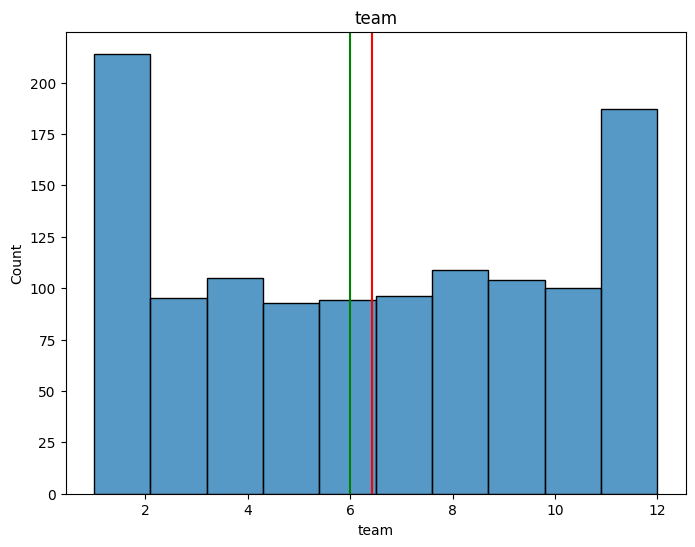

Measure of central tendency for  targeted_productivity
Mean:  0.7296324143692565
Median:  0.75
Mode:  0.8

Measure of dispersion for  targeted_productivity
Variance:  0.0095826406875606
Standard Deviation:  0.09789096325790547
Range 0.73



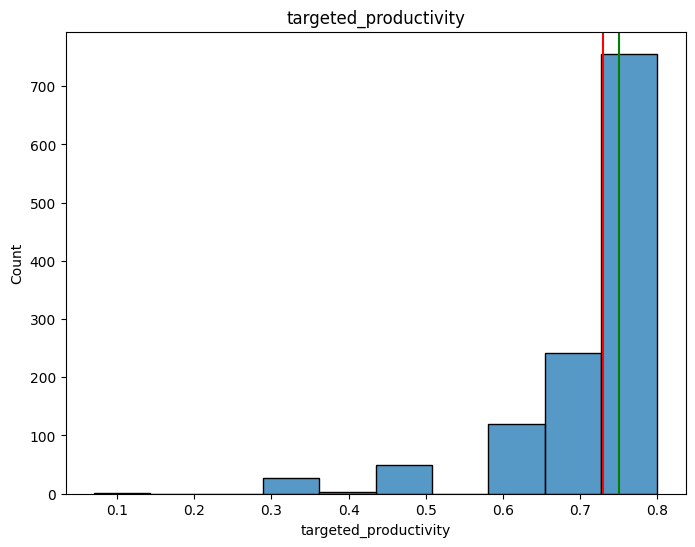

Measure of central tendency for  smv
Mean:  15.062172096908938
Median:  15.26
Mode:  3.94

Measure of dispersion for  smv
Variance:  119.75404644861874
Standard Deviation:  10.943219199514315
Range 51.660000000000004



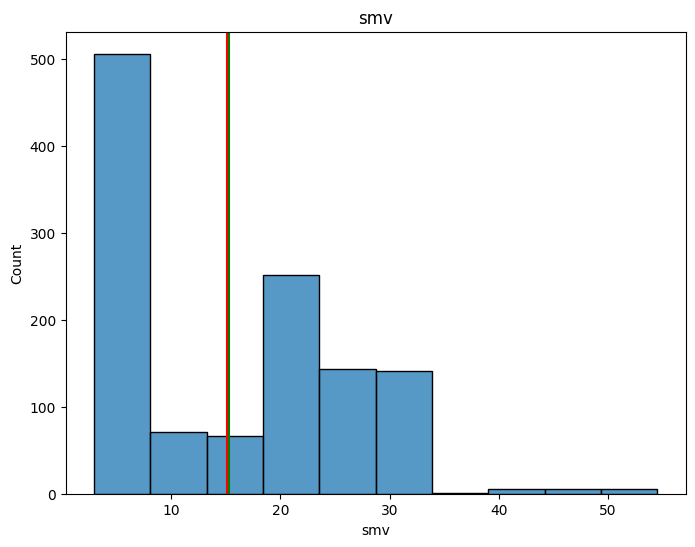

Measure of central tendency for  wip
Mean:  1126.43776106934
Median:  1039.0
Mode:  1039.0

Measure of dispersion for  wip
Variance:  1953434.4436565214
Standard Deviation:  1397.65319148082
Range 23115.0



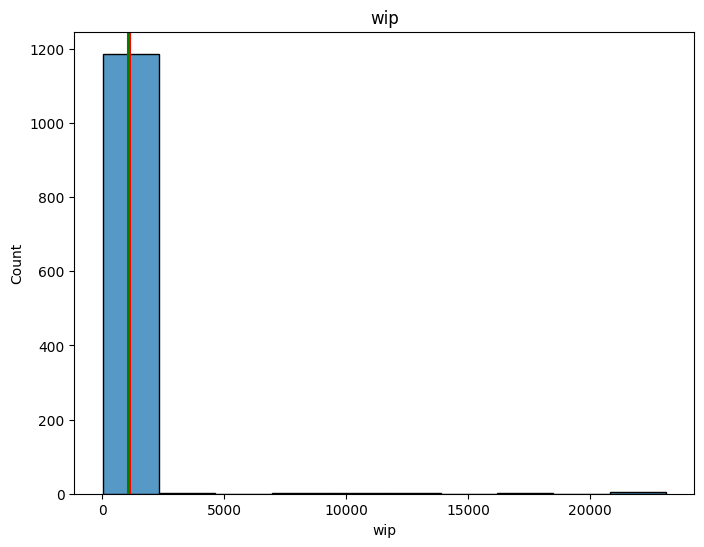

Measure of central tendency for  over_time
Mean:  4567.460317460317
Median:  3960.0
Mode:  960

Measure of dispersion for  over_time
Variance:  11214619.255321974
Standard Deviation:  3348.8235628832363
Range 25920



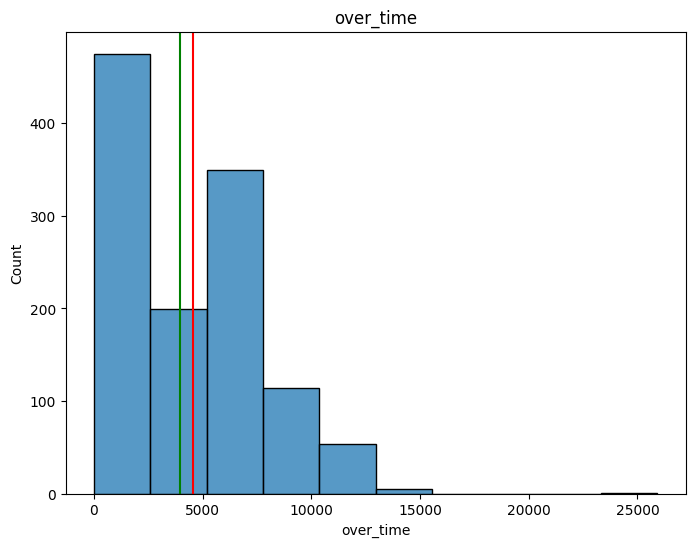

Measure of central tendency for  incentive
Mean:  38.21052631578947
Median:  0.0
Mode:  0

Measure of dispersion for  incentive
Variance:  25658.479052983625
Standard Deviation:  160.18264279560262
Range 3600



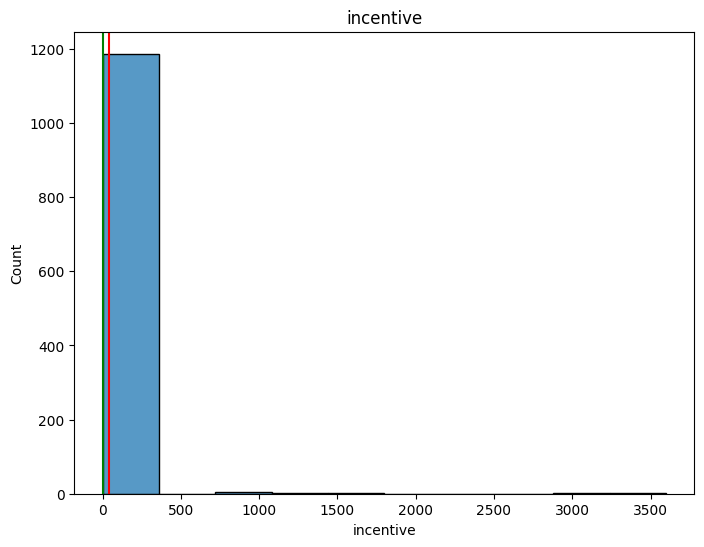

Measure of central tendency for  idle_time
Mean:  0.7301587301587301
Median:  0.0
Mode:  0.0

Measure of dispersion for  idle_time
Variance:  161.53791076073685
Standard Deviation:  12.709756518546563
Range 300.0



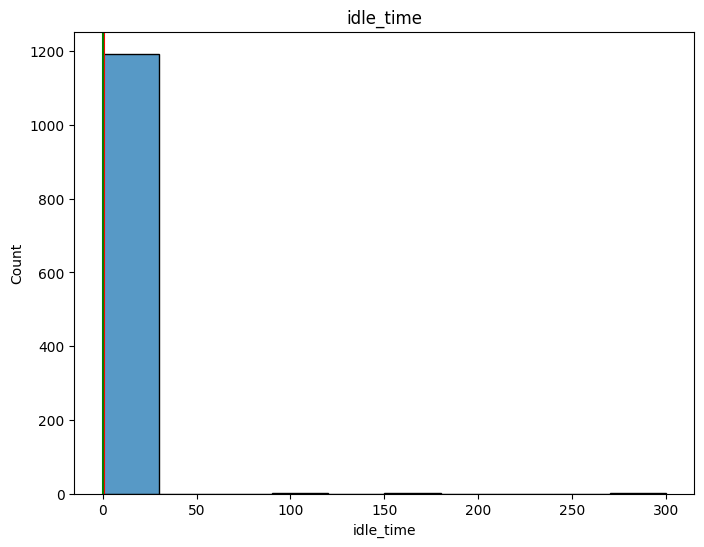

Measure of central tendency for  idle_men
Mean:  0.3692564745196324
Median:  0.0
Mode:  0

Measure of dispersion for  idle_men
Variance:  10.686278125637395
Standard Deviation:  3.268987324178146
Range 45



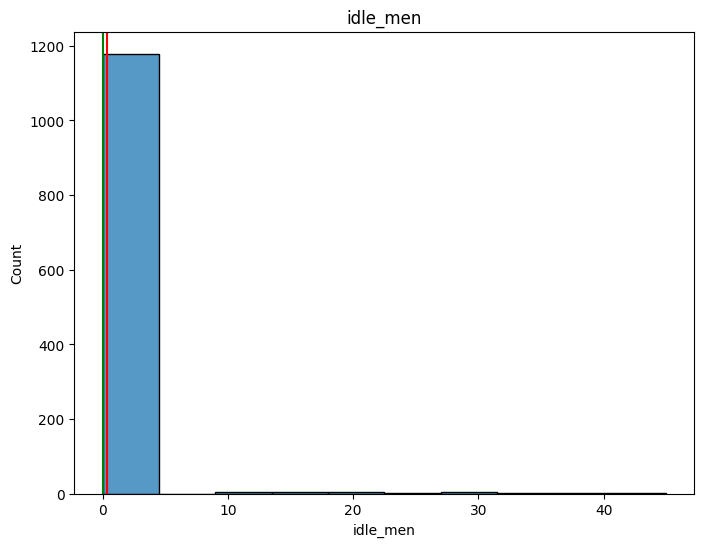

Measure of central tendency for  no_of_style_change
Mean:  0.15037593984962405
Median:  0.0
Mode:  0

Measure of dispersion for  no_of_style_change
Variance:  0.18305378831694621
Standard Deviation:  0.42784785650619567
Range 2



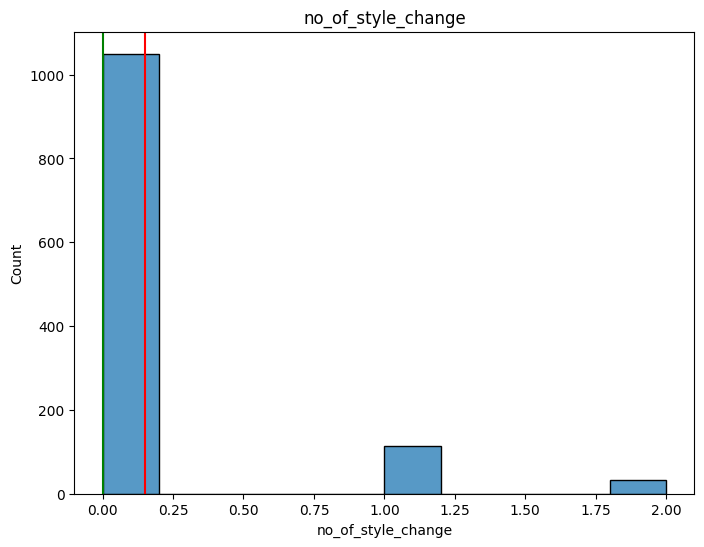

Measure of central tendency for  no_of_workers
Mean:  34.60985797827903
Median:  34.0
Mode:  8.0

Measure of dispersion for  no_of_workers
Variance:  492.73729404335813
Standard Deviation:  22.19768668225043
Range 87.0



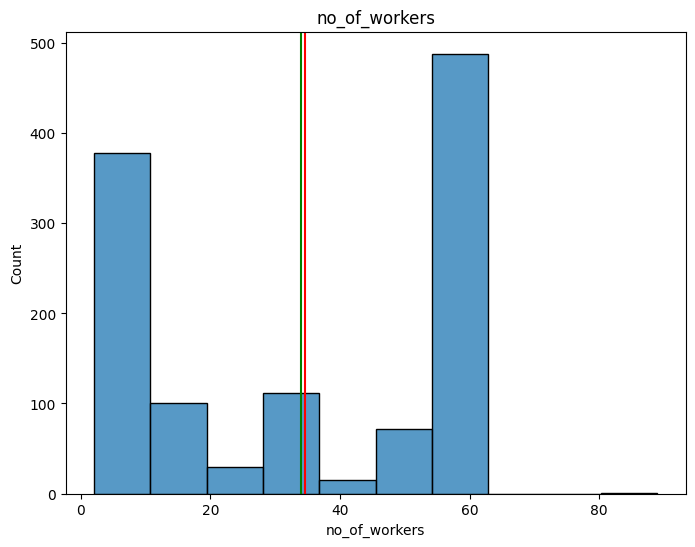

Measure of central tendency for  actual_productivity
Mean:  0.7350910969791145
Median:  0.773333333
Mode:  0.800401961

Measure of dispersion for  actual_productivity
Variance:  0.03044602847110404
Standard Deviation:  0.1744879035093953
Range 0.886732024



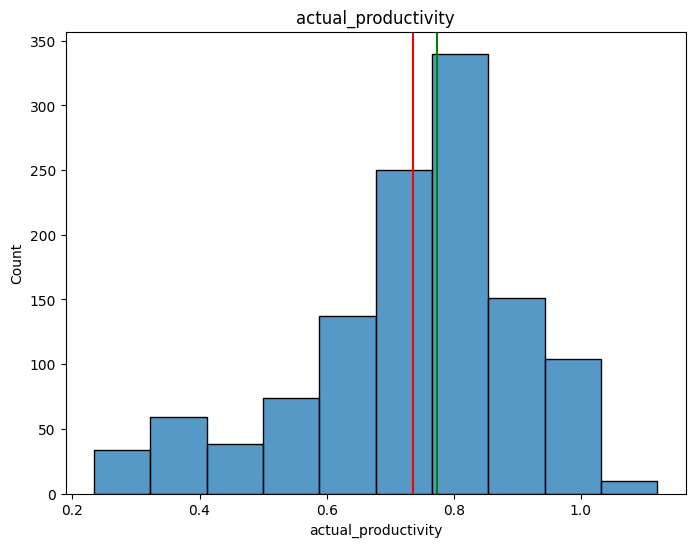

In [ ]:
for col in numerical_cols:
  univariate_analysis(df,col)

## Univariate analysis

Percent distribution for quarter
quarter
Quarter1    30.075188
Quarter2    27.986633
Quarter4    20.718463
Quarter3    17.543860
Quarter5     3.675856
Name: proportion, dtype: float64



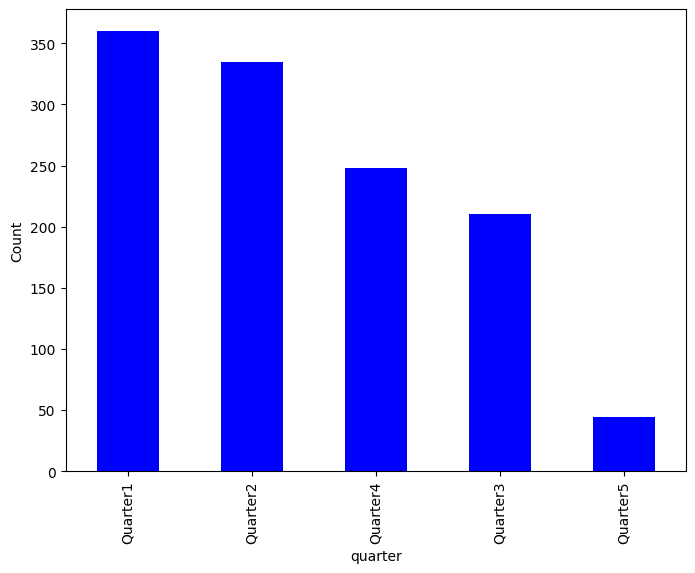

Percent distribution for department
department
sweing       57.727652
finishing    42.272348
Name: proportion, dtype: float64



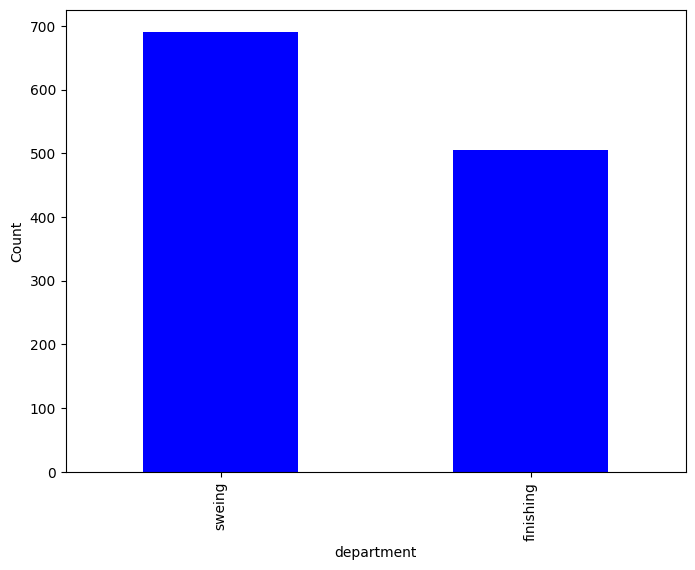

Percent distribution for day
day
Wednesday    17.376775
Sunday       16.959064
Tuesday      16.791980
Monday       16.624896
Thursday     16.624896
Saturday     15.622389
Name: proportion, dtype: float64



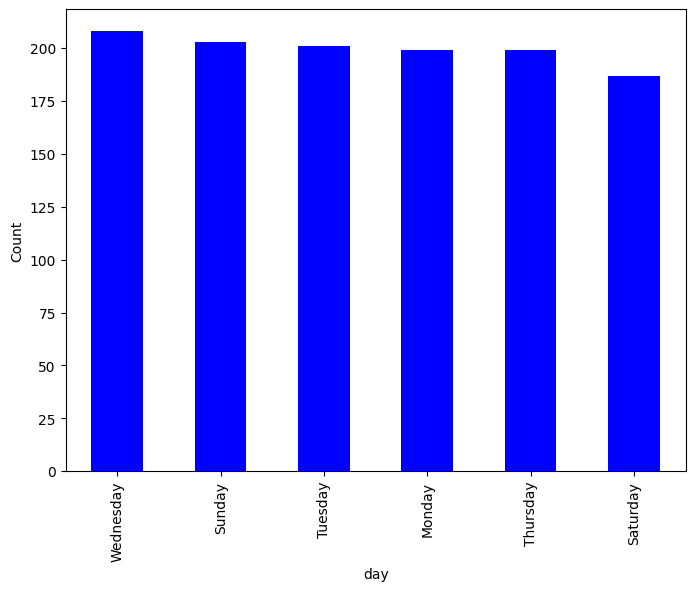

In [ ]:
for col in categorical_cols:
  univariate_catogorical_analysis(df,col)

##Bivariate analysis

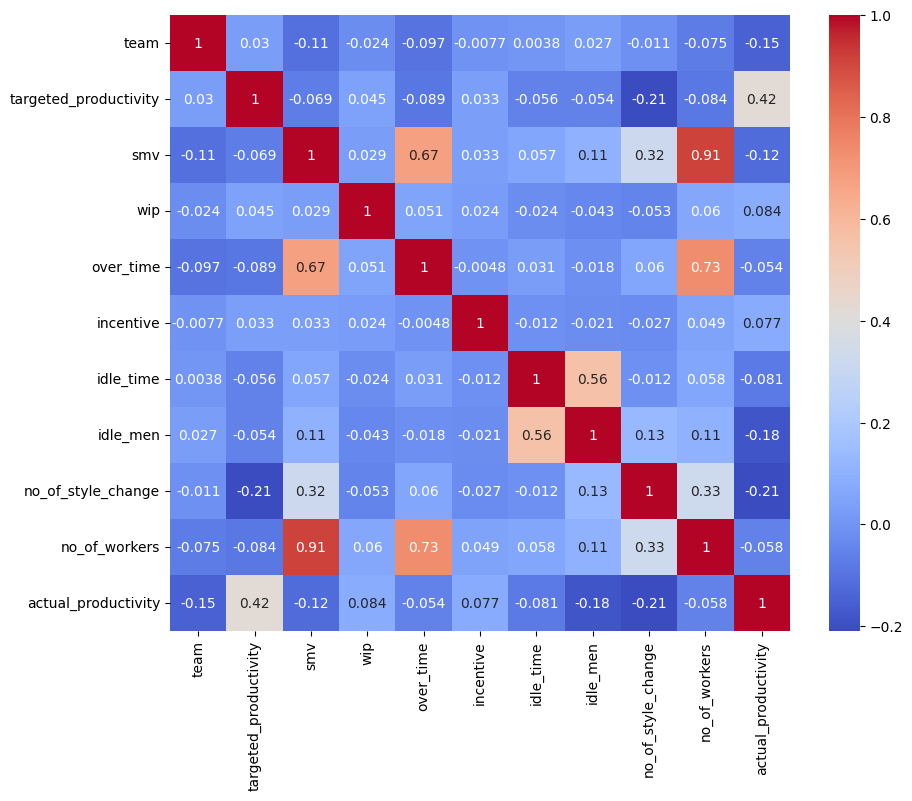

In [ ]:
num = df.select_dtypes(include = np.number)
correlation_matrix = num.corr()
correlation_matrix

plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

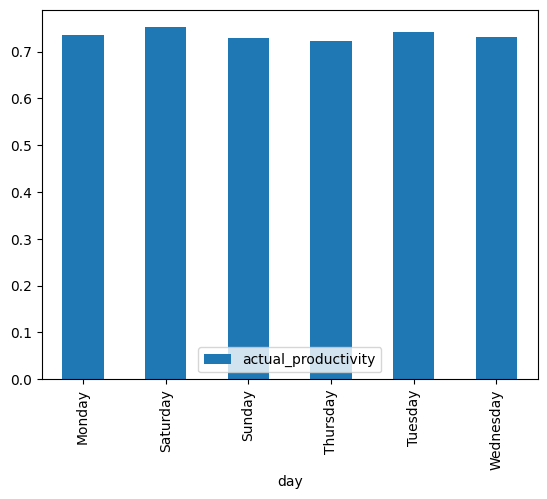

In [ ]:
df.pivot_table(index = 'day', values = 'actual_productivity').plot(kind = 'bar')
plt.show()

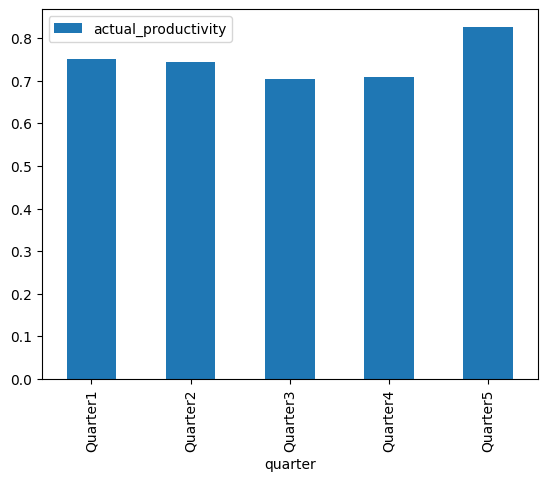

In [ ]:
df.pivot_table(index = 'quarter', values = 'actual_productivity').plot(kind = 'bar')
plt.show()

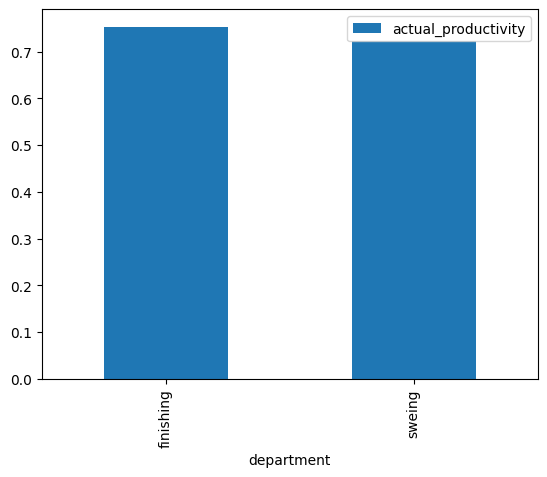

In [ ]:
df.pivot_table(index = 'department', values = 'actual_productivity').plot(kind = 'bar')
plt.show()

## Observations

## Feature Engineering/Reduction

In [ ]:
df.drop(columns = ['date'],inplace = True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   quarter                1197 non-null   category
 1   department             1197 non-null   category
 2   day                    1197 non-null   category
 3   team                   1197 non-null   int64   
 4   targeted_productivity  1197 non-null   float64 
 5   smv                    1197 non-null   float64 
 6   wip                    1197 non-null   float64 
 7   over_time              1197 non-null   int64   
 8   incentive              1197 non-null   int64   
 9   idle_time              1197 non-null   float64 
 10  idle_men               1197 non-null   int64   
 11  no_of_style_change     1197 non-null   int64   
 12  no_of_workers          1197 non-null   float64 
 13  actual_productivity    1197 non-null   float64 
dtypes: category(3), float64(6), int64(5)
mem

In [ ]:
df.over_time = df.over_time.apply(lambda x : x/60.0)
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,118.0,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,16.0,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,61.0,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,61.0,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,32.0,50,0.0,0,0,56.0,0.800382


## Data Preprocessing

In [ ]:
df = pd.get_dummies(df,columns = categorical_cols,drop_first = True)
df=df.astype(int)
df.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0,26,1108,118,98,0,0,0,59,...,0,0,0,0,1,0,0,1,0,0
1,1,0,3,1039,16,0,0,0,0,8,...,0,0,0,0,0,0,0,1,0,0
2,11,0,11,968,61,50,0,0,0,30,...,0,0,0,0,1,0,0,1,0,0
3,12,0,11,968,61,50,0,0,0,30,...,0,0,0,0,1,0,0,1,0,0
4,6,0,25,1170,32,50,0,0,0,56,...,0,0,0,0,1,0,0,1,0,0


### Train Test Split

In [ ]:
X = df.drop(['actual_productivity'],axis=1)
Y = df['actual_productivity']

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30,random_state = 30)

In [ ]:
print("Training set", X_train.shape)
print("Testing set", X_test.shape)



Training set (837, 20)
Testing set (360, 20)


## Model fitting and evaluation

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
model.score(X_train,y_train)

1.0

In [ ]:
model.score(X_test,y_test)

0.5211704721791177

In [ ]:
def adj_r2_score(predictors,targets,predictions):
  r2 = r2_score(targets,predictions)
  n = predictors.shape[0]
  k = predictors.shape[1]
  return 1-(1-r2)*(n-1)/(n-k-1)

def calc_metrics(X,y_train,y_pred):
  print("Mean Absolute error", mean_absolute_error(y_train,y_pred))
  print("Mean Squared error", np.sqrt(mean_squared_error(y_train,y_pred)))
  print("R2 - score", r2_score(y_train,y_pred))
  print("Adjusted R2 - score", adj_r2_score(X,y_train,y_pred))

adj_r2_score(X_train,y_train,model.predict(X_train))


1.0

In [ ]:
calc_metrics(X_train,y_train,model.predict(X_train))

Mean Absolute error 0.0
Mean Squared error 0.0
R2 - score 1.0
Adjusted R2 - score 1.0


## Hyper parameter tuning with grid search

#### Additional exercise: Explore more parameters to work with

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

clf = DecisionTreeRegressor()

parameters = {
    "max_depth":np.arange(3,10,1),
    "max_leaf_nodes":[50,75,150,200,300],
    "min_samples_split":[10,20,30,50,70,100]
}

_grid_obj = GridSearchCV(clf,parameters,cv = 5,verbose = 1)
_grid_obj.fit(X_train,y_train)

grid_clf = _grid_obj.best_estimator_
grid_clf

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


DecisionTreeRegressor(max_depth=3, max_leaf_nodes=300, min_samples_split=20)

In [ ]:
grid_clf.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=300, min_samples_split=20)

In [ ]:
calc_metrics(X_train,y_train,grid_clf.predict(X_train))

Mean Absolute error 0.032887164090295844
Mean Squared error 0.1282325311500476
R2 - score 0.4096010747341515
Adjusted R2 - score 0.3951305128403807


In [ ]:
calc_metrics(X_test,y_test,grid_clf.predict(X_test))

Mean Absolute error 0.025988967691095353
Mean Squared error 0.0819452944836709
R2 - score 0.8070786843434239
Adjusted R2 - score 0.7956968958091126


## Hyper parameter tuning with randomized search

#### Additional exercise: Explore more parameters to work with

In [ ]:
clf = DecisionTreeRegressor()

parameters = {
    "max_depth":np.arange(3,10,1),
    "max_leaf_nodes":[50,75,150,200,300],
    "min_samples_split":[10,20,30,50,70,100]
}

_grid_obj = RandomizedSearchCV(clf,parameters,cv = 5,verbose = 1,n_iter = 30)
_grid_obj = _grid_obj.fit(X_train,y_train)

random_clf = _grid_obj.best_estimator_
random_clf

Fitting 5 folds for each of 30 candidates, totalling 150 fits


DecisionTreeRegressor(max_depth=3, max_leaf_nodes=150, min_samples_split=20)

## Observations:

In [ ]:
random_clf.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=150, min_samples_split=20)

In [ ]:
calc_metrics(X_train,y_train,random_clf.predict(X_train))

Mean Absolute error 0.032887164090295844
Mean Squared error 0.1282325311500476
R2 - score 0.4096010747341515
Adjusted R2 - score 0.3951305128403807


In [ ]:
calc_metrics(X_test,y_test,random_clf.predict(X_test))

Mean Absolute error 0.025988967691095353
Mean Squared error 0.0819452944836709
R2 - score 0.8070786843434239
Adjusted R2 - score 0.7956968958091126
